In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statistics import mean
from typing import List, Dict, Any

In [9]:
pong_lr00025_df = pd.read_csv('test_results/pong-v5_test1/Pong-v5_train_LR00025_3574episodes.csv')
pong_lr001_df = pd.read_csv('test_results/pong-v5_test2/Pong-v5_train_LR001_3311episodes.csv')
breakout_default_df = pd.read_csv('test_results/breakout-v5_test1/Breakout-v5_train_LR00025_8326episodes.csv')
breakout_high_freq_posterior_df = pd.read_csv('test_results/breakout-v5_test2/Breakout-v5_train_LR00025_PU_per2000.csv')

In [17]:
def read_data(df: pd.DataFrame, moving_average_divisor=20) -> Dict[str, Any]:
    num_gd_time_steps: List[int] = df['num_gd_time_steps'].to_list()
    episodal_reward: List[float] = df['episodal_reward'].to_list()
    averaging_size = int(len(episodal_reward)/moving_average_divisor)
    averages: List[float] = [mean(episodal_reward[i:i+averaging_size]) for i in range(0, len(episodal_reward))] 
    return {
        'gd_step': num_gd_time_steps, 
        'reward': episodal_reward, 
        'avg_reward': averages, 
        'avg_interval': averaging_size
    }

In [18]:
pong_data1 = read_data(pong_lr00025_df[:3300])
pong_data2 = read_data(pong_lr001_df[:3300])
breakout_data1 = read_data(breakout_default_df[:2700])
breakout_data2 = read_data(breakout_high_freq_posterior_df[:2700])

#### Generate the plot consisting of two different training curves for <code>ALE/Breakout-v5</code>

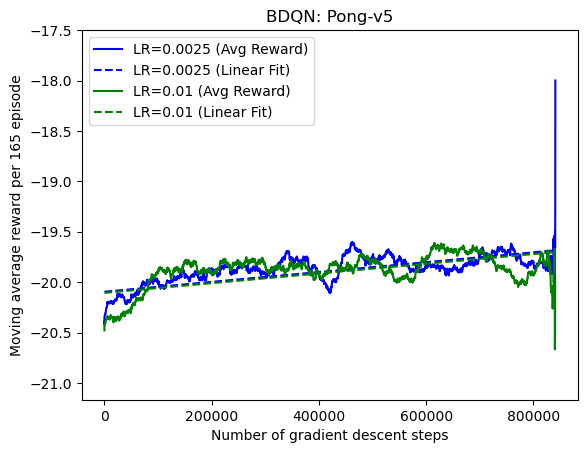

In [19]:
coef_pong1 = np.polyfit(pong_data1['gd_step'], pong_data1['reward'], 1)
pong1_linear_reg_fn = np.poly1d(coef_pong1) 

coef_pong2 = np.polyfit(pong_data2['gd_step'], pong_data2['reward'], 1)
pong2_linear_reg_fn = np.poly1d(coef_pong2) 

# Plotting
plt.plot(
    pong_data1['gd_step'], 
    pong_data1['avg_reward'], 'b', 
    label='LR=0.0025 (Avg Reward)'
)
plt.plot(
    pong_data1['gd_step'], 
    pong1_linear_reg_fn(pong_data1['gd_step']), '--b', 
    label='LR=0.0025 (Linear Fit)'
)
plt.plot(
    pong_data2['gd_step'], 
    pong_data2['avg_reward'], 'g', 
    label='LR=0.01 (Avg Reward)'
)
plt.plot(
    pong_data2['gd_step'], 
    pong2_linear_reg_fn(pong_data2['gd_step']), '--g', 
    label='LR=0.01 (Linear Fit)'
)
plt.ylim(min(pong_data1['avg_reward'] + pong_data2['avg_reward'])-0.5, 
         max(pong_data1['avg_reward'] + pong_data2['avg_reward'])+0.5)
plt.ylabel(f"Moving average reward per {pong_data1['avg_interval']} episode")
plt.xlabel("Number of gradient descent steps")
plt.title('BDQN: Pong-v5')
plt.legend()
plt.savefig("pong-v5_learning.png", dpi=600)
plt.show()

#### Generate the plot consisting of two different training curves for <code>ALE/Breakout-v5</code>

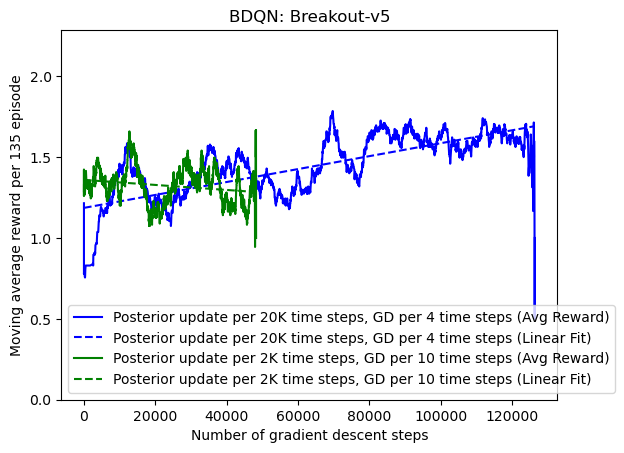

In [21]:
coef_breakout1 = np.polyfit(breakout_data1['gd_step'], breakout_data1['reward'], 1)
breakout1_linear_reg_fn = np.poly1d(coef_breakout1) 

coef_breakout2 = np.polyfit(breakout_data2['gd_step'], breakout_data2['reward'], 1)
breakout2_linear_reg_fn = np.poly1d(coef_breakout2) 

# Plotting
plt.plot(
    breakout_data1['gd_step'], 
    breakout_data1['avg_reward'], 'b', 
    label='Posterior update per 20K time steps, GD per 4 time steps (Avg Reward)'
)
plt.plot(
    breakout_data1['gd_step'], 
    breakout1_linear_reg_fn(breakout_data1['gd_step']), '--b', 
    label='Posterior update per 20K time steps, GD per 4 time steps (Linear Fit)'
)
plt.plot(
    breakout_data2['gd_step'], 
    breakout_data2['avg_reward'], 'g', 
    label='Posterior update per 2K time steps, GD per 10 time steps (Avg Reward)'
)
plt.plot(
    breakout_data2['gd_step'], 
    breakout2_linear_reg_fn(breakout_data2['gd_step']), '--g', 
    label='Posterior update per 2K time steps, GD per 10 time steps (Linear Fit)'
)
plt.ylim(min(breakout_data1['avg_reward'] + breakout_data2['avg_reward'])-0.5, 
         max(breakout_data1['avg_reward'] + breakout_data2['avg_reward'])+0.5)
plt.ylabel(f"Moving average reward per {breakout_data1['avg_interval']} episode")
plt.xlabel("Number of gradient descent steps")
plt.title('BDQN: Breakout-v5')
plt.legend()
plt.savefig("breakout-v5_learning.png", dpi=600)
plt.show()